---

# (실습준비) 데이터 불러오기부터

* 17년도부터 21년도 까지의 데이터를 train set, 22년도의 6개월치 데이터를 test set 으로 설정합니다.

In [34]:
# 학습 데이터 로딩
import pandas as pd
train_set=pd.read_csv('df_total.csv')
test_set=pd.read_csv('df_test.csv')


---

# 1. 데이터 전처리

#### [실습문제1] 열 추가 
* 기존 '기준일ID'열에서 날짜 데이터를 추출하여 새로운 열로 추가 합니다.
    - pd.to_datetime() 함수를 사용해 '기준일ID'열을 datetime 형식으로 변경하겠습니다.
    - year, month, day 열로 기존 데이터 프레임에 연월일 정보를 저장합니다.
    - 데이터 프레임 열에 대해 날짜 정보를 얻을 때에는 **dt.year**, **dt.month**, **dt.day** 속성을 사용합니다. 

In [35]:
train_set['기준일ID'] = pd.to_datetime(train_set['기준일ID'])
test_set['기준일ID'] = pd.to_datetime(test_set['기준일ID'])

#### 코로나 거리두기 여부 추가하기

In [36]:
## 코로나 거리두기 시작, 종료시점
start_date = pd.to_datetime('2020-02-29')
end_date = pd.to_datetime('2022-04-18')

In [37]:
train_set['Covid_SD'] = (train_set['기준일ID'] >= start_date) & (train_set['기준일ID'] <= end_date)
test_set['Covid_SD'] = (test_set['기준일ID'] >= start_date) & (test_set['기준일ID'] <= end_date)

In [38]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43512 entries, 0 to 43511
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   기준일ID            43512 non-null  datetime64[ns]
 1   시간대구분            43512 non-null  int64         
 2   총생활인구수           43512 non-null  float64       
 3   여자총생활인구수         43512 non-null  float64       
 4   남자총생활인구수         43512 non-null  float64       
 5   남자0세부터9세생활인구수    43512 non-null  float64       
 6   남자10세부터14세생활인구수  43512 non-null  float64       
 7   남자15세부터19세생활인구수  43512 non-null  float64       
 8   남자20세부터24세생활인구수  43512 non-null  float64       
 9   남자25세부터29세생활인구수  43512 non-null  float64       
 10  남자30세부터34세생활인구수  43512 non-null  float64       
 11  남자35세부터39세생활인구수  43512 non-null  float64       
 12  남자40세부터44세생활인구수  43512 non-null  float64       
 13  남자45세부터49세생활인구수  43512 non-null  float64       
 14  남자50세부터54세생활인구수  43512 non-null  float

In [39]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train_set['year'] = train_set['기준일ID'].dt.year
train_set['month'] = train_set['기준일ID'].dt.month
train_set['day'] = train_set['기준일ID'].dt.day
train_set['day_name'] = train_set['기준일ID'].dt.weekday

In [40]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
test_set['year'] = test_set['기준일ID'].dt.year
test_set['month'] = test_set['기준일ID'].dt.month
test_set['day'] = test_set['기준일ID'].dt.day
test_set['day_name'] = test_set['기준일ID'].dt.weekday

#### [실습문제2] 불필요한 열 제거 및 열 이름 변경
* df_total과 df_test에서 '총생활인구수'외에 불필요한 열을 제거 하도록 하겠습니다.
* 시간 데이터를 남기고, '시간대구분' column 을 'hour'로 rename 하도록 하겠습니다. 

In [41]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
dropped_columns = ['기준일ID'] + train_set.columns[train_set.columns.str.contains('자')].tolist()

# 추출한 열을 삭제
train_set.drop(dropped_columns, axis=1, inplace=True)
train_set = train_set.rename(columns={"시간대구분": "hour"})

In [42]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
dropped_columns = ['기준일ID'] + test_set.columns[test_set.columns.str.contains('자')].tolist()

# 추출한 열을 삭제
test_set.drop(dropped_columns, axis=1, inplace=True)
test_set = test_set.rename(columns={"시간대구분": "hour"})

In [43]:
print(train_set.columns)
print(test_set.columns)

Index(['hour', '총생활인구수', 'Covid_SD', 'year', 'month', 'day', 'day_name'], dtype='object')
Index(['hour', '총생활인구수', 'Covid_SD', 'year', 'month', 'day', 'day_name'], dtype='object')


#### 시각화

In [44]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# test.head()
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

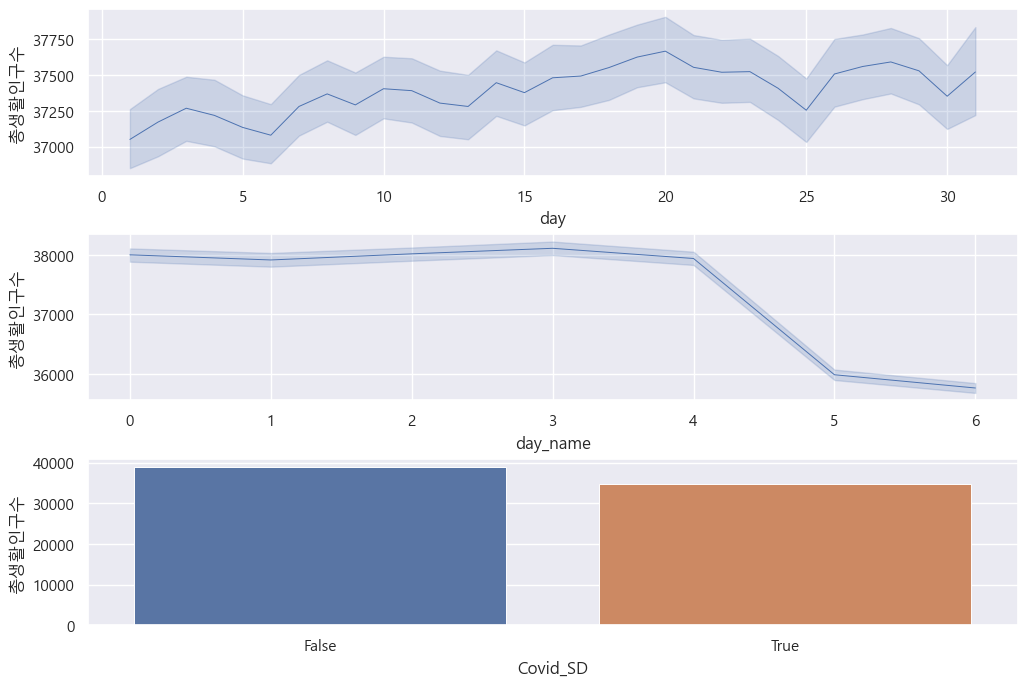

In [46]:
## train(22년 이전)
plt.figure(figsize = (12,8))
plt.subplot(3, 1, 1)
sns.lineplot(x = 'day', y = '총생활인구수', data = train_set, linewidth = .7)
plt.subplots_adjust(hspace=0.35)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'day_name', y = '총생활인구수', data = train_set, linewidth = .7)
plt.subplots_adjust(hspace=0.35)
plt.subplot(3, 1, 3)
sns.barplot(x = 'Covid_SD', y = '총생활인구수', data = train_set, linewidth = .7)

plt.show()

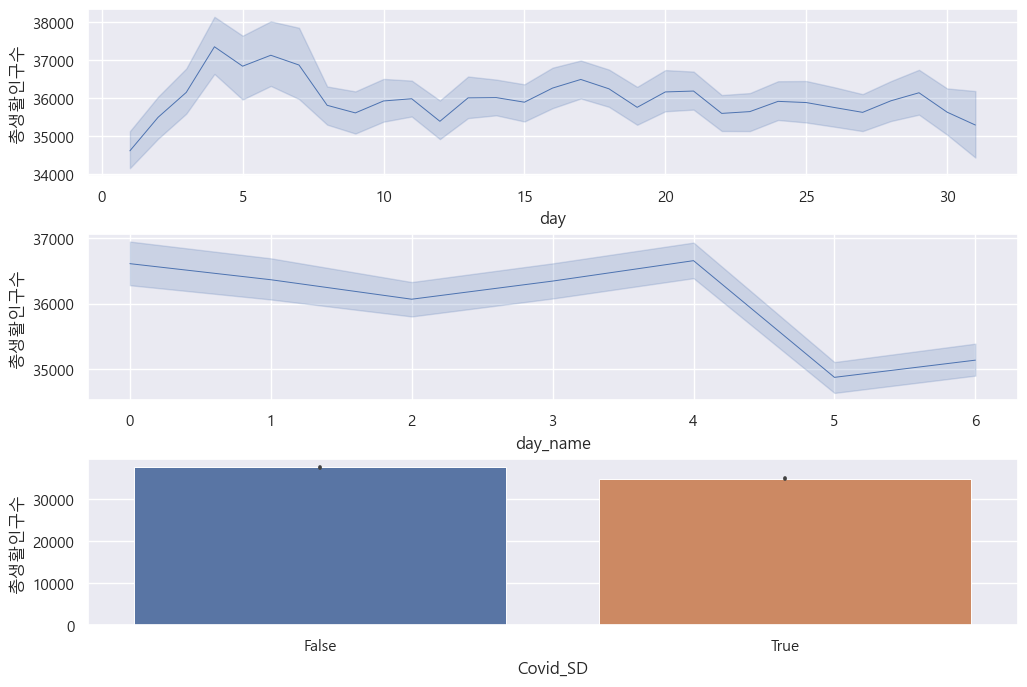

In [47]:
## test(22년)
plt.figure(figsize = (12,8))
plt.subplot(3, 1, 1)
sns.lineplot(x = 'day', y = '총생활인구수', data = test_set, linewidth = .7)
plt.subplots_adjust(hspace=0.35)
plt.subplot(3, 1, 2)
sns.lineplot(x = 'day_name', y = '총생활인구수', data = test_set, linewidth = .7)
plt.subplots_adjust(hspace=0.35)
plt.subplot(3, 1, 3)
sns.barplot(x = 'Covid_SD', y = '총생활인구수', data = test_set, linewidth = .7)

plt.show()

**주말인 경우와 평일인 경우 / 사회적 거리두기인지 아닌지에 대해 총생활인구수**


**분포가 다름**

**평균에 비해 주말에 생활인구수가 적은 것을 알 수 있음**

#### [실습문제3] 시프트 & 롤링
* shift()를 활용하여 이동할 행 수를 지정합니다.
* rolling()을 활용하여 추가할 이동평균 수를 지정합니다.

In [48]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train_set['총생활인구수_lag1']=train_set['총생활인구수'].shift(24)
test_set['총생활인구수_lag1']=test_set['총생활인구수'].shift(24)

#### [실습문제4] 결측치 처리 및 불필요한 열 제거
* 롤링 & 시프트 과정에서 발생한 결측치를 처리하도록 하겠습니다.
* 불필요한 열을 추가로 제거 하겠습니다.(시간 관련 행들)

In [49]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train_set['총생활인구수_lag1'].fillna(train_set['총생활인구수_lag1'].mean(), inplace=True)
test_set['총생활인구수_lag1'].fillna(test_set['총생활인구수_lag1'].mean(), inplace=True)

In [50]:
display(train_set.head())
test_set.head()

,hour,총생활인구수,Covid_SD,year,month,day,day_name,총생활인구수_lag1
0,0,31535.2200,False,2017,1,1,6,37391.883052
1,1,31188.9174,False,2017,1,1,6,37391.883052
2,2,31240.4974,False,2017,1,1,6,37391.883052
3,3,31442.4314,False,2017,1,1,6,37391.883052
4,4,31922.7751,False,2017,1,1,6,37391.883052


,hour,총생활인구수,Covid_SD,year,month,day,day_name,총생활인구수_lag1
0,0,30509.7386,True,2022,1,1,5,36007.123902
1,1,30759.5067,True,2022,1,1,5,36007.123902
2,2,31048.8787,True,2022,1,1,5,36007.123902
3,3,31076.1092,True,2022,1,1,5,36007.123902
4,4,31714.9309,True,2022,1,1,5,36007.123902


#### [실습문제5] train, test 데이터 나누기
* df_total과 df_test를 각각 train_x, train_y, test_x, test_y 로 나누어 주세요.
* 인덱스를 리셋 해주세요.

In [51]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
target='총생활인구수'
train_x=train_set.drop(columns=target,axis=1)
train_y=train_set[target]
test_x=test_set.drop(columns=target,axis=1)
test_y=test_set[target]

In [52]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
display(train_x.head())
display(train_y.head())
display(test_x.head())
display(test_y.head())

,hour,Covid_SD,year,month,day,day_name,총생활인구수_lag1
0,0,False,2017,1,1,6,37391.883052
1,1,False,2017,1,1,6,37391.883052
2,2,False,2017,1,1,6,37391.883052
3,3,False,2017,1,1,6,37391.883052
4,4,False,2017,1,1,6,37391.883052


0    31535.2200
1    31188.9174
2    31240.4974
3    31442.4314
4    31922.7751
Name: 총생활인구수, dtype: float64

,hour,Covid_SD,year,month,day,day_name,총생활인구수_lag1
0,0,True,2022,1,1,5,36007.123902
1,1,True,2022,1,1,5,36007.123902
2,2,True,2022,1,1,5,36007.123902
3,3,True,2022,1,1,5,36007.123902
4,4,True,2022,1,1,5,36007.123902


0    30509.7386
1    30759.5067
2    31048.8787
3    31076.1092
4    31714.9309
Name: 총생활인구수, dtype: float64

---

## 다음 단계를 위해서 데이터를 저장하겠습니다.

In [53]:
# CSV로 저장
train_x.to_csv('train_x.csv', index = False)
train_y.to_csv('train_y.csv', index = False)
test_x.to_csv('test_x.csv', index = False)
test_y.to_csv('test_y.csv', index = False)

---